<a href="https://colab.research.google.com/github/insuperabilez/vk-test/blob/main/vk_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install catboost
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install traitlets
!pip install ipython
!pip install ipywidgets
!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRanker, Pool, MetricVisualizer
from copy import deepcopy

plt.style.use("Solarize_Light2")


from sklearn.model_selection import train_test_split
from sklearn.metrics import ndcg_score




In [2]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1r8iEoCt-qKEzbGrmT414vbv9_rbPlrNW' -O train_df.csv
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1PCmLbAjAjseei3n_dQVwDqxArs25mIBJ' -O test_df.csv

--2024-03-08 16:24:15--  https://docs.google.com/uc?export=download&id=1r8iEoCt-qKEzbGrmT414vbv9_rbPlrNW
Resolving docs.google.com (docs.google.com)... 172.253.123.102, 172.253.123.139, 172.253.123.113, ...
Connecting to docs.google.com (docs.google.com)|172.253.123.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1r8iEoCt-qKEzbGrmT414vbv9_rbPlrNW&export=download [following]
--2024-03-08 16:24:15--  https://drive.usercontent.google.com/download?id=1r8iEoCt-qKEzbGrmT414vbv9_rbPlrNW&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.97.132, 2607:f8b0:400c:c18::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.97.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7223337 (6.9M) [application/octet-stream]
Saving to: ‘train_df.csv’

train_df.csv        100%[===================>]   6.89M  --.-KB/s   

In [3]:
!python --version

Python 3.10.12


In [4]:
train_df = pd.read_csv('train_df.csv')
test_df = pd.read_csv('test_df.csv')

In [5]:
train_df.head()

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
0,758,9,0,0,1,20,3,40,0,3,...,0.204682,0.271755,0.055623,0,0,0,0.38648,0.0,0.0,0
1,758,9,0,0,1,20,3,40,0,3,...,0.195531,0.188787,0.036914,0,0,0,0.10982,0.0,0.0,0
2,758,9,0,0,1,20,3,40,0,3,...,0.148609,0.186517,0.027718,0,0,0,0.03674,0.0,0.0,0
3,758,9,0,0,1,20,3,40,0,3,...,0.223748,0.229039,0.051247,0,0,0,0.00000,0.0,0.0,0
4,758,9,0,0,1,20,3,40,0,3,...,0.170935,0.249031,0.042568,0,0,0,0.00000,0.0,0.0,0


In [6]:
train_df.isna().sum().sum()

0

In [7]:
train_df.describe()

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
count,15081.000000,15081.0,15081.000000,15081.000000,15081.000000,15081.000000,15081.000000,15081.000000,15081.000000,15081.000000,...,15081.000000,15081.000000,15081.000000,15081.0,15081.0,15081.0,15081.000000,15081.000000,15081.000000,15081.000000
mean,254806.827465,9.0,0.193754,0.464293,0.629865,15.928519,3.876401,33.802467,1.211193,1.793847,...,0.199545,0.426543,0.096461,0.0,0.0,0.0,0.297465,0.030543,0.031207,0.021351
std,142374.568081,0.0,0.626654,1.183076,0.482857,5.311422,0.469749,11.316810,2.234887,1.885131,...,0.088724,0.247388,0.063323,0.0,0.0,0.0,0.311962,0.112984,0.115598,0.144558
min,116.000000,9.0,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,134823.000000,9.0,0.000000,0.000000,0.000000,9.000000,4.000000,26.000000,0.000000,0.000000,...,0.168583,0.255086,0.052658,0.0,0.0,0.0,0.036740,0.000000,0.000000,0.000000
50%,255859.000000,9.0,0.000000,0.000000,1.000000,20.000000,4.000000,34.000000,0.000000,2.000000,...,0.212743,0.430880,0.091705,0.0,0.0,0.0,0.176140,0.000000,0.000000,0.000000
75%,376175.000000,9.0,0.000000,0.000000,1.000000,20.000000,4.000000,44.000000,1.000000,3.000000,...,0.253825,0.603686,0.136017,0.0,0.0,0.0,0.529100,0.000000,0.000000,0.000000
max,496975.000000,9.0,3.000000,6.000000,1.000000,20.000000,6.000000,49.000000,7.000000,7.000000,...,0.485510,0.999072,0.411563,0.0,0.0,0.0,1.000020,0.846272,0.908132,1.000000


In [8]:
train_df['target'].value_counts(normalize=True)

0    0.978649
1    0.021351
Name: target, dtype: float64

In [9]:
cols =train_df.nunique()==1
cols = cols[cols==1]
cols

feature_0     True
feature_73    True
feature_74    True
feature_75    True
dtype: bool

4 признака имеют лишь 1 уникальное значение, их можно убрать из датасета

In [10]:
for df in [train_df,test_df]:
  df = df.drop(['feature_0','feature_73','feature_74','feature_75'],axis=1,inplace=True)

<Axes: >

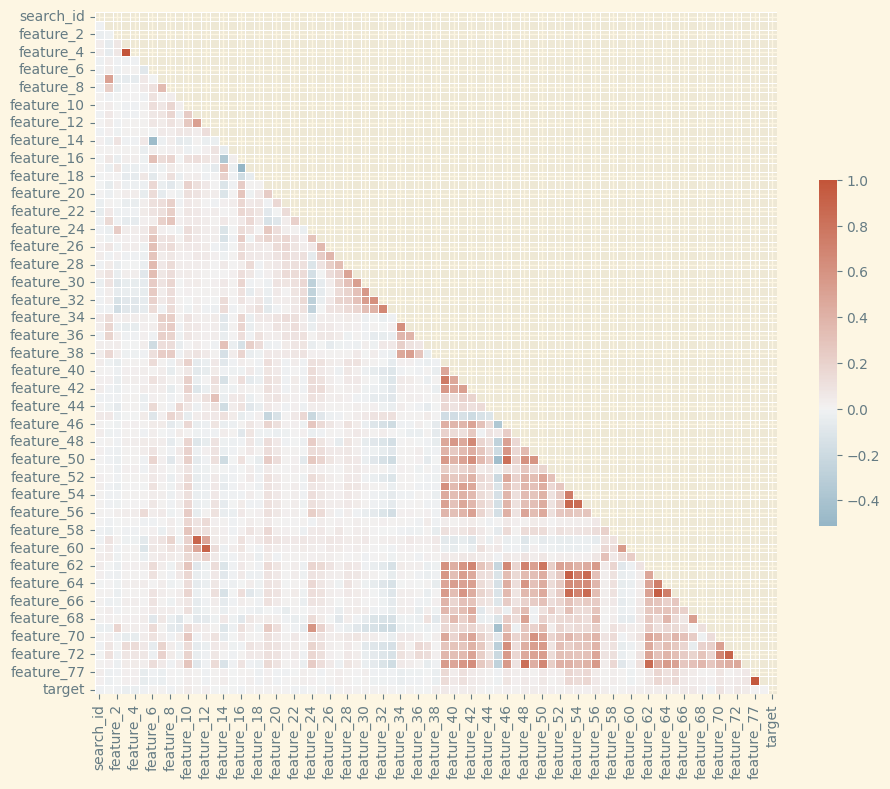

In [11]:
corr = train_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [12]:
corr_matrix = train_df.corr().abs()
corr_series = corr_matrix.stack()
high_corr_features = corr_series[(corr_series > 0.9) & (corr_series.index.get_level_values(0) != corr_series.index.get_level_values(1))].index.tolist()
print(high_corr_features)

[('feature_3', 'feature_4'), ('feature_4', 'feature_3'), ('feature_12', 'feature_60'), ('feature_53', 'feature_63'), ('feature_60', 'feature_12'), ('feature_63', 'feature_53'), ('feature_63', 'feature_65'), ('feature_65', 'feature_63'), ('feature_71', 'feature_72'), ('feature_72', 'feature_71'), ('feature_77', 'feature_78'), ('feature_78', 'feature_77')]


In [13]:
drop_cols = ['feature_3','feature_12','feature_63','feature_71','feature_77']

In [14]:
for df in [train_df,test_df]:
  df = df.drop(drop_cols,axis=1,inplace=True)

In [15]:
cat_cols = []
for column in train_df.columns:
    if train_df[column].nunique() <20:
        cat_cols.append(column)
cat_cols=cat_cols[:-1]
for df in [train_df,test_df]:
  df[cat_cols] = df[cat_cols].astype("string")

ndcg с удалением столбцов 0.5096
macro avg f1 0.61

In [16]:
col_use = [c for c in train_df.columns if c not in ["target",'search_id']]


In [17]:
cat_idx=[]
categorical_columns = df.dtypes.loc[df.dtypes == 'string'].index
print(categorical_columns)
for column in categorical_columns:
  index = df.columns.get_loc(column)
  cat_idx.append(index)
cat_idx=[x-1 for x in cat_idx]

Index(['feature_1', 'feature_2', 'feature_4', 'feature_5', 'feature_7',
       'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_13',
       'feature_14', 'feature_15', 'feature_61'],
      dtype='object')


In [18]:
X_train = train_df.drop(['search_id','target'], axis=1)#.values
y_train = train_df['target']#.values
queries_train = train_df['search_id'].values

X_test = test_df.drop(['search_id','target'], axis=1)#.values
y_test = test_df['target']#.values
queries_test = test_df['search_id'].values

In [19]:
num_queries = np.unique(queries_train).shape[0]
num_queries

1000

In [20]:
train = Pool(
    data=X_train,
    label=y_train,
    group_id=queries_train,
    cat_features=cat_idx,
)

test = Pool(
    data=X_test,
    label=y_test,
    group_id=queries_test,
    cat_features=cat_idx

)

In [21]:
default_parameters  = {
    'iterations': 2000,
    'custom_metric': ['NDCG'],
    'verbose': False,
    'random_seed': 42,
    "has_time":True,
    "metric_period":4,
    "save_snapshot":False,
    "use_best_model":True,
}

parameters = {}

In [22]:
def fit_model(loss_function, additional_params=None, train_pool=train, test_pool=test):
    parameters = deepcopy(default_parameters)
    parameters['loss_function'] = loss_function
    parameters['train_dir'] = loss_function

    if additional_params is not None:
        parameters.update(additional_params)

    model = CatBoostRanker(**parameters)
    model.fit(train_pool, eval_set=test_pool, plot=True)

    return model

In [23]:
model = fit_model('YetiRank')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [24]:
ndcg = model.score(test_df.drop(['search_id','target'],axis=1), test_df['target'],test_df['search_id'])

In [25]:
print(ndcg)

0.927258487128681
